Data found here:
https://archive.ics.uci.edu/dataset/320/student+performance

In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import ucimlrepo


In [20]:
# !pip3 install -U ucimlrepo 

In [21]:
# Using pandas read_csv to automatically get data into a dataframe
# note that the data is separated by semicolons and pandas must be informed in order to parse the csv
student_math = pd.read_csv('/Users/ssureen/Documents/QMUL/DataVisualistion/student+performance/student/student-mat.csv', sep=';')
student_por = pd.read_csv('/Users/ssureen/Documents/QMUL/DataVisualistion/student+performance/student/student-por.csv',sep = ';')

## Analysing the Math results

In [22]:
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
print(student_math.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

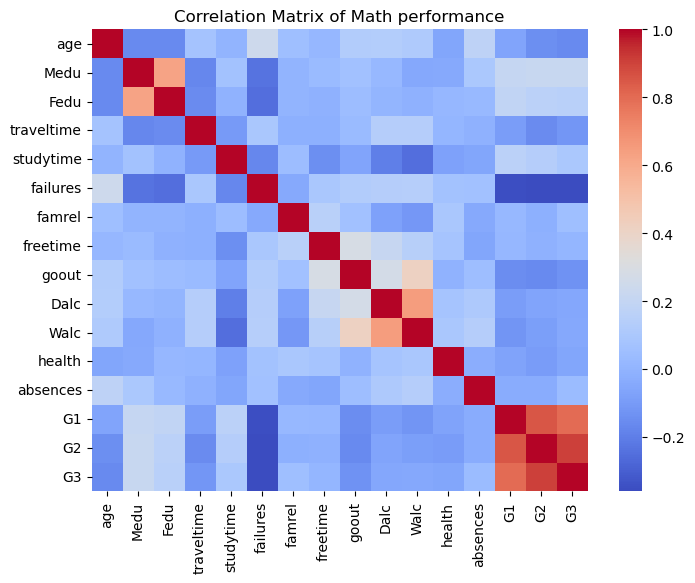

In [24]:
# filtering out variables that didn't have any number data types
math_numeric_df = student_math.select_dtypes(include=['number'])
# correlation matrix using built-in pandas function
corr = math_numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix of Math performance')
plt.show()

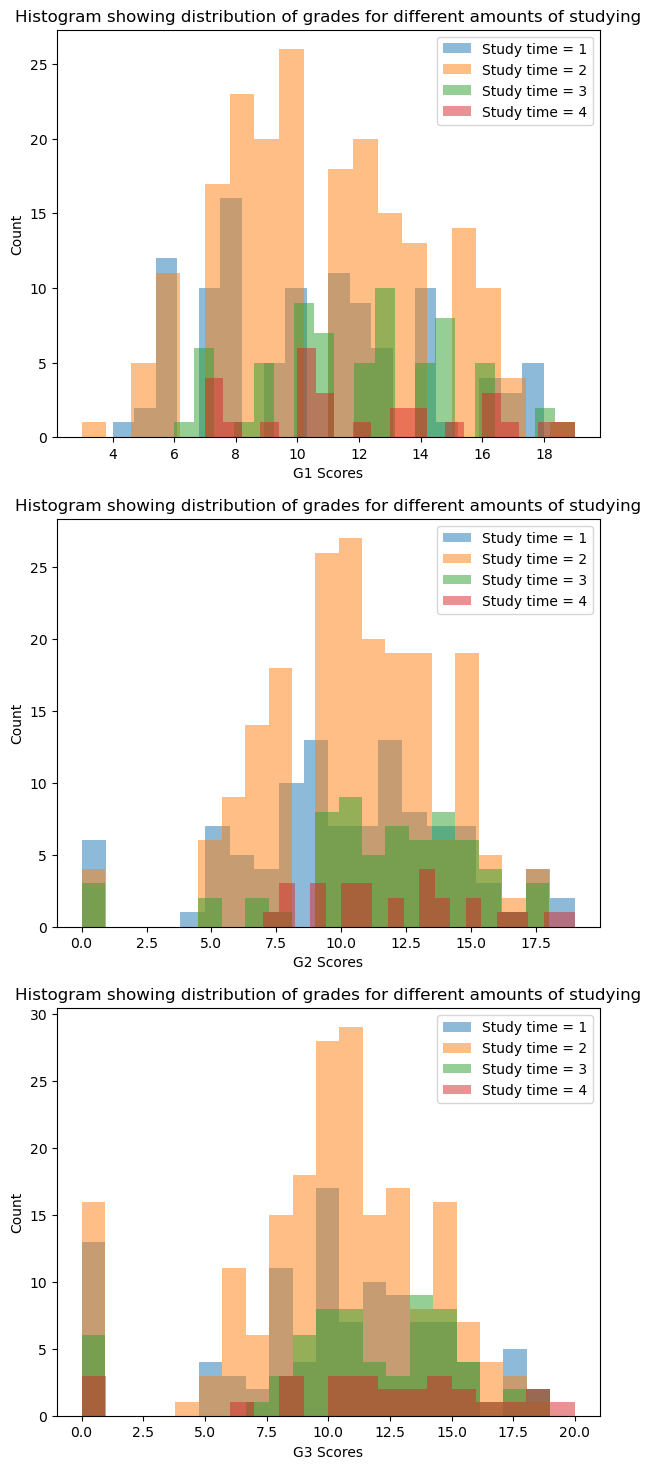

In [48]:
grade_label = ['G1','G2','G3']
fig, axs = plt.subplots(3,1, figsize = (7,18))
for k, current_grade in enumerate(grade_label):
    for i in range(1,5):
        axs[k].hist(student_math[student_math['studytime']==i][current_grade], alpha = 0.5, label = f'Study time = {i}', bins = 20)
    axs[k].legend()
    axs[k].set(title = 'Histogram showing distribution of grades for different amounts of studying',
               xlabel = f'{current_grade} Scores',
               ylabel = 'Count')
plt.show()
# plt.scatter(student_math['studytime'],student_math['G1'])

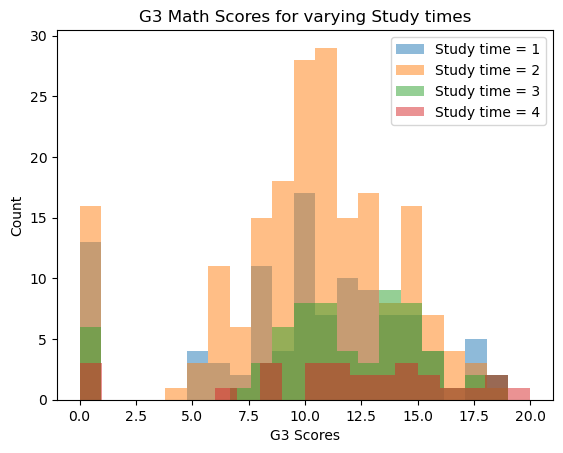

In [58]:
fig, ax = plt.subplots()
for i in range(1,5):
    ax.hist(student_math[student_math['studytime']==i][current_grade], alpha = 0.5, label = f'Study time = {i}', bins = 20)
ax.legend()
ax.set(xlabel='G3 Scores',
       ylabel = 'Count',
       title ='G3 Math Scores for varying Study times')
plt.show()

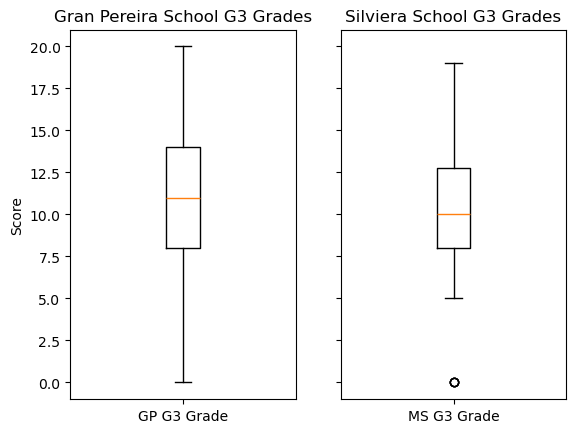

In [77]:
# create 2 subplots with a common y axis
fig, axs = plt.subplots(1,2, sharey=True)
# filter for different schools
GP_math_df = student_math[student_math['school']=='GP']
MS_math_df = student_math[student_math['school']=='MS']
# Boxplot of G3 grades
axs[0].boxplot(GP_math_df['G3'])
axs[0].set(title='Gran Pereira School G3 Grades',ylabel = 'Score', xticklabels = ['GP G3 Grade'])
axs[1].boxplot(MS_math_df['G3'])
axs[1].set(title='Silviera School G3 Grades', xticklabels = ['MS G3 Grade'])
plt.show()



<Axes: title={'center': 'G3'}, xlabel='Pstatus'>

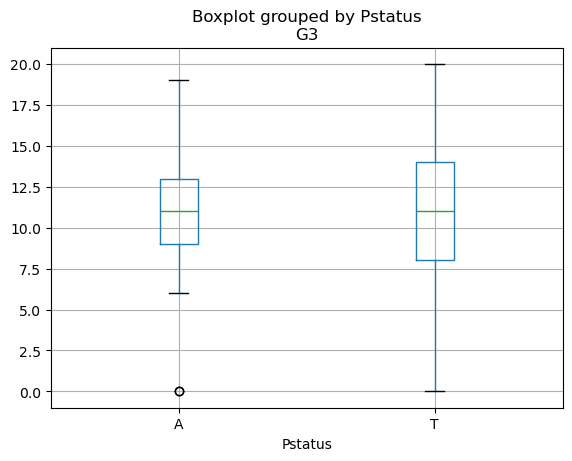

In [89]:
student_math.boxplot(column='health',by='')

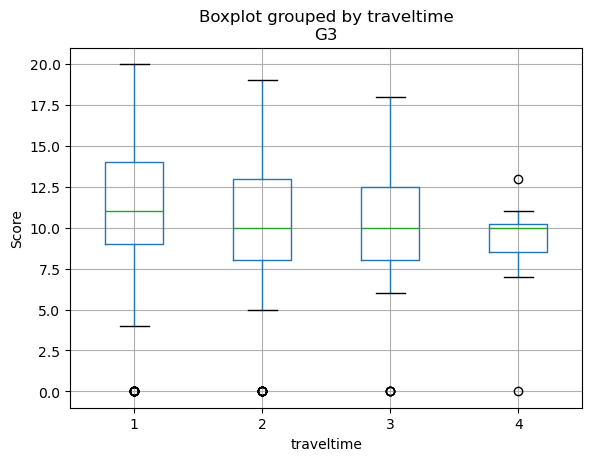

In [88]:
student_math.boxplot(column='G3', by='traveltime', ylabel='Score')
plt.show()

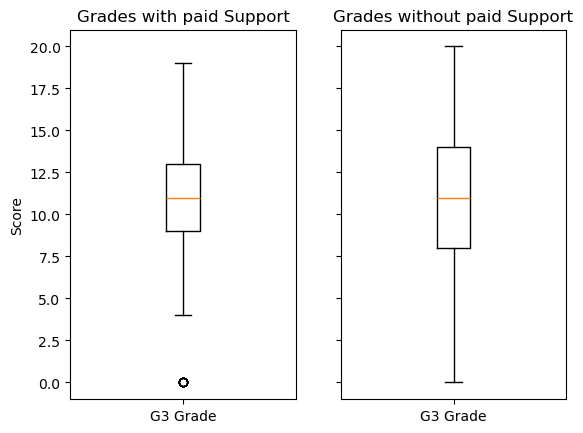

In [78]:
fig, axs = plt.subplots(1,2, sharey=True)
# split in to students who recieved paid support at school
with_sup_df = student_math[student_math['paid']=='yes']
no_sup_df = student_math[student_math['paid']=='no']

axs[0].boxplot(with_sup_df['G3'])
axs[0].set(title='Grades with paid Support', xticklabels = ['G3 Grade'], ylabel = 'Score')
axs[1].boxplot(no_sup_df['G3'])
axs[1].set(title='Grades without paid Support', xticklabels = ['G3 Grade'])
plt.show()

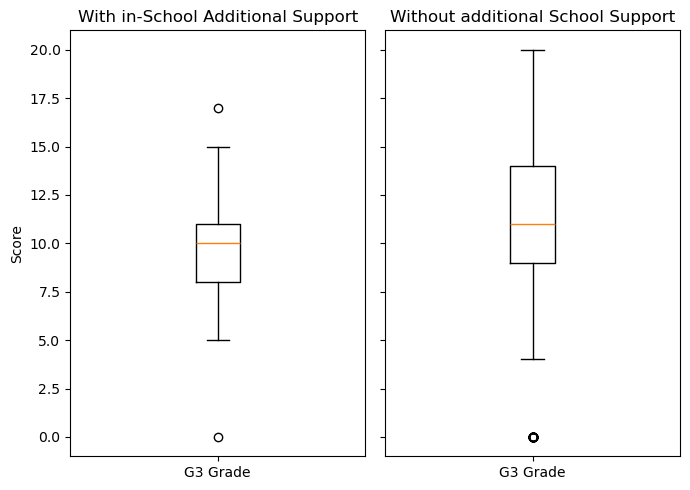

In [83]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(7,5))
# split in to students who recieved paid support at school
add_school_df = student_math[student_math['schoolsup']=='yes']
no_school_df = student_math[student_math['schoolsup']=='no']

axs[0].boxplot(add_school_df['G3'])
axs[0].set(title='With in-School Additional Support', xticklabels = ['G3 Grade'], ylabel = 'Score')
axs[1].boxplot(no_school_df['G3'])
axs[1].set(title='Without additional School Support', xticklabels = ['G3 Grade'])
plt.tight_layout()
plt.show()

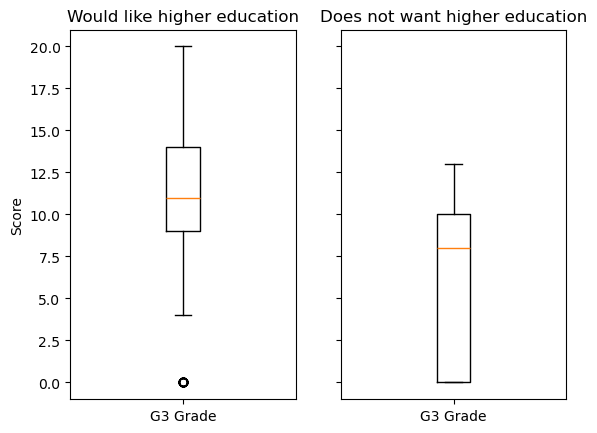

In [84]:
fig, axs = plt.subplots(1,2, sharey=True)
# split in to students who want to go in to higher education
higher_df = student_math[student_math['higher']=='yes']
no_higher_df = student_math[student_math['higher']=='no']

axs[0].boxplot(higher_df['G3'])
axs[0].set(title='Would like higher education', xticklabels = ['G3 Grade'], ylabel='Score')
axs[1].boxplot(no_higher_df['G3'])
axs[1].set(title='Does not want higher education', xticklabels = ['G3 Grade'])
plt.show()

In [65]:
with_sup_df['higher'].value_counts()

higher
yes    180
no       1
Name: count, dtype: int64

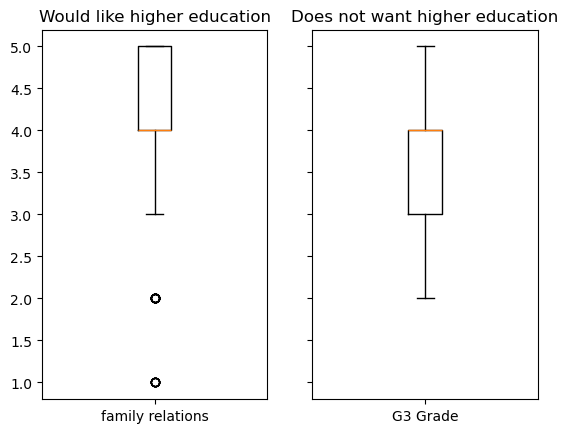

In [69]:
fig, axs = plt.subplots(1,2, sharey=True)
# split in to students who want to go in to higher education
higher_df = student_math[student_math['higher']=='yes']
no_higher_df = student_math[student_math['higher']=='no']

axs[0].boxplot(higher_df['famrel'])
axs[0].set(title='Would like higher education', xticklabels = ['family relations'])
axs[1].boxplot(no_higher_df['famrel'])
axs[1].set(title='Does not want higher education', xticklabels = ['Family relations'])
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
# split in to students who want to go in to higher education
higher_df = student_math[student_math['higher']=='yes']
no_higher_df = student_math[student_math['higher']=='no']

axs[0].boxplot(higher_df['famrel'])
axs[0].set(title='Would like higher education', xticklabels = ['family relations'])
axs[1].boxplot(no_higher_df['famrel'])
axs[1].set(title='Does not want higher education', xticklabels = ['G3 Grade'])
plt.show()

In [74]:
higher_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


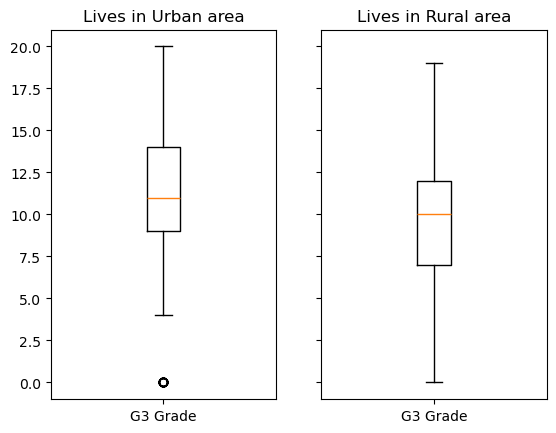

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


In [67]:
fig, axs = plt.subplots(1,2, sharey=True)
# split in to students who want to go in to higher education
urban_df = student_math[student_math['address']=='U']
rural_df = student_math[student_math['address']=='R']

axs[0].boxplot(urban_df['G3'])
axs[0].set(title='Lives in Urban area', xticklabels = ['G3 Grade'])
axs[1].boxplot(rural_df['G3'])
axs[1].set(title='Lives in Rural area', xticklabels = ['G3 Grade'])
plt.show()

urban_df

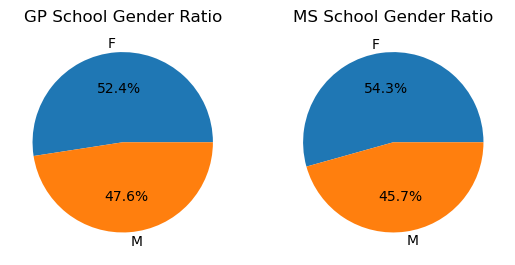

In [46]:
fig, axs = plt.subplots(1,2)
# filter for the sex data series
genders = GP_math_df['sex'].value_counts() # value counts gives possible values and their frequency
axs[0].pie(genders.values, labels = genders.index, autopct='%1.1f%%') 
axs[0].set(title='GP School Gender Ratio')

genders = MS_math_df['sex'].value_counts()
axs[1].pie(genders.values, labels = genders.index, autopct='%1.1f%%')
axs[1].set(title='MS School Gender Ratio')
plt.show()


## Analysing Portuguese Scores
All data is the same except for G1, G2 and G3. The previous analysis can be easily repeated here.

In [31]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
